<a href="https://colab.research.google.com/github/Vvitoor21/ProjetoGovernanca/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bibliotecas utilizadas**

PANDAS: Pandas é uma biblioteca em Python para manipulação e análise de dados.
Como um todo ela ferece estruturas e operações para manipular tabelas numéricas e séries temporais.

NUMPY: Numpy é uma biblioteca que suporta o processamento de grandes, multi-dimensionais arrays e matrizes,
juntamente com uma grande coleção de funções matemáticas de alto nível para operar,
que superam muitos conjuntos de calculos numericos

MATPLOTLIB: O matplotlib é uma biblioteca com recursos para a geração de gráficos a partir de arrays

SEABORN: Seaborn é uma biblioteca também usada para geração de gráficos
porém é superior da biblioteca matplotlib e também está intimamente integrado às estruturas de dados dos pandas .

COUNTER: Counter é uma subclasse de dict especialmente projetada para contar objetos hashable em Python. É um dicionário que armazena objetos como chaves e conta como valores.

STATIC: Métodos estáticos em Python são extremamente semelhantes aos métodos de nível de classe python, a diferença é que um método estático está vinculado a uma classe em vez dos objetos dessa classe. Isso significa que um método estático pode ser chamado sem um objeto para essa classe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics as static

dados = pd.read_csv('/content/sample_data/ocorrencias_cenipa.csv')
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


Apresentação de uma ´revia do conjunto de dados para serem usados como referência nos gráficos a seguir

In [ ]:
dados.shape

(5242, 21)

Gráfico com um quantidade de 21 colunas e 5242 linhas

In [ ]:
dados.aeronave_pais_fabricante.value_counts() 

BRASIL              5139
ESTADOS UNIDOS        49
NÃO IDENTIFICADO      11
PARAGUAI               8
CHILE                  5
PORTUGAL               5
BOLÍVIA                4
ALEMANHA               3
ESPANHA                3
PANAMÁ                 2
FRANÇA                 2
ARGENTINA              2
COLÔMBIA               2
ÁFRICA DO SUL          1
SUIÇA                  1
URUGUAI                1
CINGAPURA              1
POLÔNIA                1
ITÁLIA                 1
VENEZUELA              1
Name: aeronave_pais_fabricante, dtype: int64

É possível notar que Brasil e Estados unidos seguem liderando os maiores casos de acidentes.

In [ ]:
tipos = pd.DataFrame(dados.aeronave_tipo.value_counts())
tipos.reset_index(inplace=True)
tipos.rename_axis('Index', axis = 1,inplace=True)
tipos.rename(columns={'index':'Nivel', 'aeronave_tipo': 'Quantidade'},inplace=True)
tipos

Index,Nivel,Quantidade
0,AVIÃO,4213
1,HELICÓPTERO,600
2,ULTRALEVE,308
3,INDETERMINADO,86
4,PLANADOR,15
5,ANFÍBIO,12
6,TRIKE,5
7,DIRIGÍVEL,1
8,BALÃO,1
9,HIDROAVIÃO,1


Durante a presentação é possível verificar que a concentração de tipos de aeronave está em aviões e helicópteros

In [ ]:
dados.describe().round()

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.0,5242.0,5242.0,5242.0,5242.0
mean,56472.0,2014.0,1.0,28.0,1863.0
std,13046.0,3.0,0.0,55.0,507.0
min,39115.0,2010.0,1.0,0.0,0.0
25%,46024.0,2012.0,1.0,2.0,1978.0
50%,51694.0,2014.0,1.0,6.0,1992.0
75%,66451.0,2017.0,1.0,10.0,2007.0
max,79227.0,2019.0,3.0,384.0,9999.0


De forma resumida a função apresentaa quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo.
Com o método describe() acima, é possivel notar dentro de todo o conjunto de dados, uma média de acidentes no ano de 2014. Seguido pela quantidade minima em 2010 e a máxima em 2019.

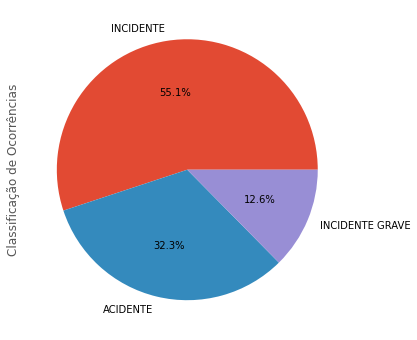

In [ ]:
dados['tipo'].value_counts().plot(kind='pie',autopct='%1.1f%%',label="Classificação de Ocorrências" ,figsize=(6, 6))
plt.show()

O gráfico apresenta a porcentagem e o tipo de ocorrencias de acidentes de todos os dados do DataFrame.Incluindo todos os países. É possível notar a maior quantidade sendo do tipo: "INCIDENTE", correpondendo 55,1 % dos casos totais.

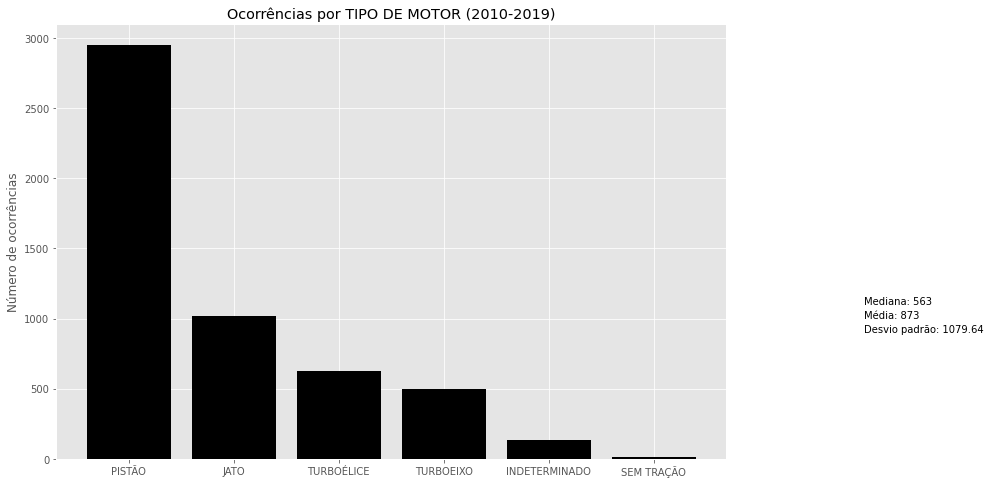

In [12]:

motor_tipo = Counter(dados['motor_tipo'])
fase_motor_tipo= sorted(motor_tipo, key = motor_tipo.get, reverse = True)
contador_motor_tipo = sorted(list(motor_tipo.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(12, 8))

x=fase_motor_tipo
y=contador_motor_tipo

rects1=ax.bar(x, y,color='black')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por TIPO DE MOTOR (2010-2019)')
plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_motor_tipo))))
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_motor_tipo))))
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_motor_tipo)))   


plt.show()

Os tipos de motores com as maiores quantidades de acidentes na categoria "Pistão". Com resultados acima da média.Seguidos por Jato,Turboélice e Indeterminado.
A categoria pistão bate quantidades chegando perto de **3000** casos, onde o restante não passam dos **1500**.

A média do número de ocorrencias por tipo de motoe é de **87%**.

In [ ]:
danos = pd.DataFrame(dados.aeronave_nivel_dano.value_counts())
danos.reset_index(inplace=True)
danos.rename_axis('Index', axis = 1)
danos.rename(columns={'index':'Nivel', 'aeronave_nivel_dano': 'Quantidade'},inplace=True)

In [2]:
dadosbrasil = dados[(dados.aeronave_pais_fabricante == 'BRASIL')]
dadosbrasil = pd.DataFrame(dadosbrasil)
dadosbrasil.head() #Criando DataFrame somente com dados do Brasil

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


## **Comparação de dados brasileiros e dados mundiais**

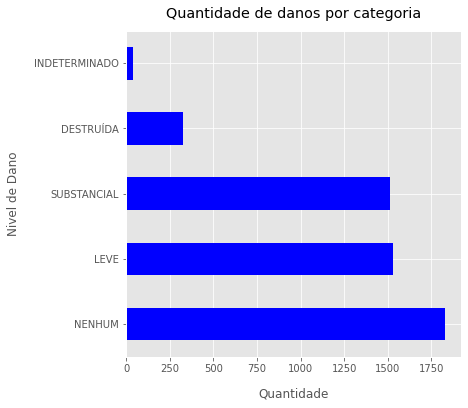

In [ ]:
dados['aeronave_nivel_dano'].value_counts().plot(kind='barh',label="Classificação de Ocorrências" ,figsize=(6, 6),color='blue')
plt.xlabel("Quantidade", labelpad=14)
plt.ylabel("Nivel de Dano", labelpad=14)
plt.title("Quantidade de danos por categoria", y=1.02);
plt.show()

Observa-se uma maioria de casos com nenhum dano apesar dos acidentes. A ordem dos demais segue-se nesta ordem: Leve, substancial ,destruída e inderteminado.

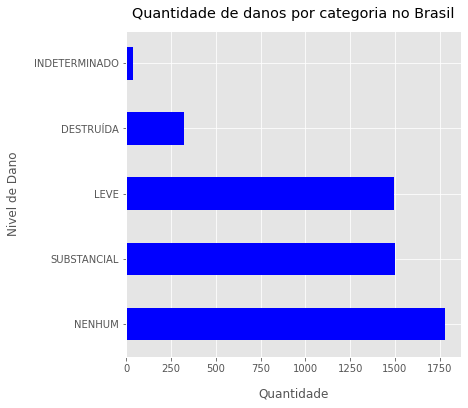

In [ ]:
dadosbrasil['aeronave_nivel_dano'].value_counts().plot(kind='barh',label="Classificação de Ocorrências" ,figsize=(6, 6),color='blue')
plt.xlabel("Quantidade", labelpad=14)
plt.ylabel("Nivel de Dano", labelpad=14)
plt.title("Quantidade de danos por categoria no Brasil", y=1.02);
plt.show()

Observa-se que no Brasil, a categoria de acidente substancial tem uma maior quantidade em relação as dados totais

Apesar dos níveis de dano serem de maioridade "Nenhum" para ambos, o Brasil segue com quantidade maiores seguidos por "substancial", comparados com dados mundiais de maioridade "Leve"

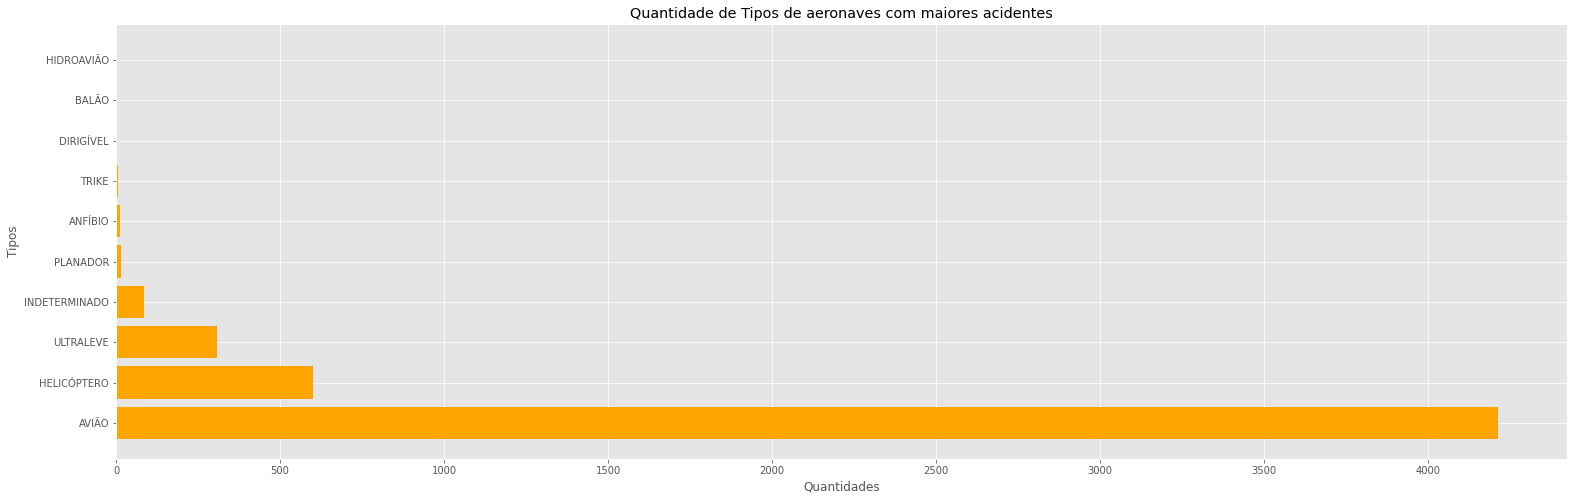

In [ ]:
plt.figure(figsize = (26,8))
plt.barh(tipos.Nivel,tipos.Quantidade, color='orange')
plt.title('Quantidade de Tipos de aeronaves com maiores acidentes')
plt.xlabel('Quantidades')
plt.ylabel('Tipos')
plt.show()

In [ ]:
tipos.describe().round()

Index,Quantidade
count,10.0
mean,524.0
std,1311.0
min,1.0
25%,2.0
50%,14.0
75%,252.0
max,4213.0


De forma gráfica é possível observar uma grande quantidade de acidentes bastante concentrados na categoria "Avião".
De forma geral, temos uma média de 524 acidentes pos categoria. E um desvio padrão de 1311.

In [ ]:
anos = pd.DataFrame(dados.aeronave_ano_fabricacao.value_counts())
anos.reset_index(inplace=True)
anos.rename_axis('Index', axis = 1,inplace=True)
anos.rename(columns={'index':'Ano', 'aeronave_ano_fabricacao': 'Quantidade'},inplace=True)
anos.head(6)

Index,Ano,Quantidade
0,0,345
1,2008,229
2,2010,220
3,2009,216
4,2011,197
5,2012,194


É possível notar, apesar de não trazer nenhum gráfico, que existe um aumento de quantidade de acidentes enquanto os anos passam.

## **DADOS DO BRASIL**

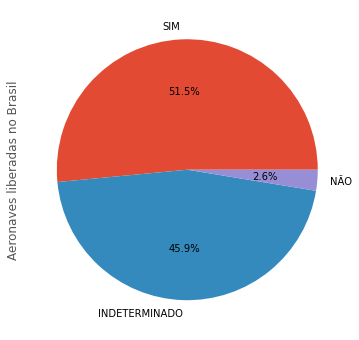

In [ ]:
plt.figure(figsize=(18,6))
dadosbrasil['aeronave_liberada'].value_counts().plot(kind='pie',autopct='%1.1f%%',label="Aeronaves liberadas no Brasil" ,figsize=(6, 6))
plt.show()

O Gráfico de pizza apresenta que mais de 50% dos acidentes ocorreram com aeronaves que já foram liberadas.

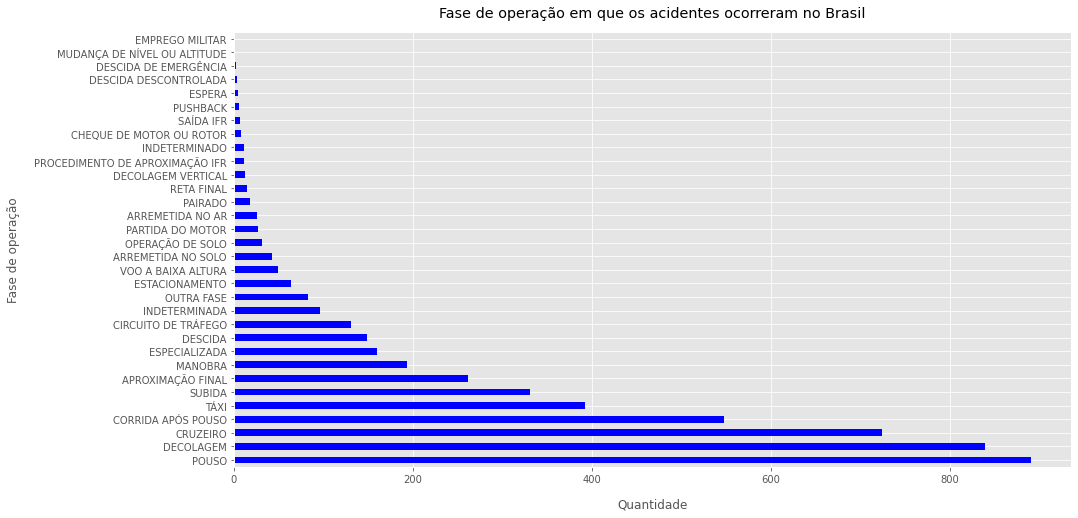

In [ ]:

dadosbrasil['aeronave_fase_operacao'].value_counts().plot(kind='barh',label="Classificação de Ocorrências" ,figsize=(15, 8),color='blue')
plt.xlabel("Quantidade", labelpad=14)
plt.ylabel("Fase de operação", labelpad=14)
plt.title("Fase de operação em que os acidentes ocorreram no Brasil", y=1.02);
plt.show()

No Brasil, durante as feses de operações, aconteceram maiores quantidades de acidentes acima da média entre as fases de "pouso", "decolagem" e "cruzeiro".

## **REGRESSÃO LINEAR**

<Figure size 1296x432 with 0 Axes>

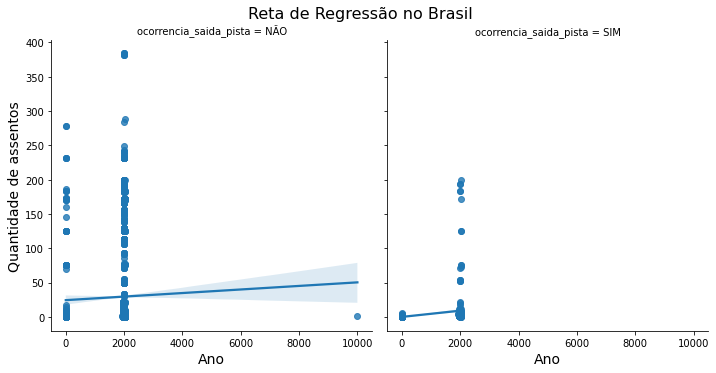

In [5]:
plt.figure(figsize=(18,6))

ax = sns.lmplot(x="aeronave_ano_fabricacao", y="aeronave_assentos", data=dadosbrasil, col="ocorrencia_saida_pista")
ax.fig.suptitle('Reta de Regressão no Brasil', fontsize=16, y=1.02)
ax.set_xlabels("Ano", fontsize=14)
ax.set_ylabels("Quantidade de assentos", fontsize=14)
plt.show()

Dividimos a reta deste método de regressão linear, para comparar casos de occorencias de acidentes onde é dividos aeronaves que saíram da pista ao lado das aeronaves que não saíram.

É possível notar um crescimento da reta é ambos os casos,  porém existem um valor grande em relação as aeronaves com grandes quantidades de assentos chagando a mais de **350**.

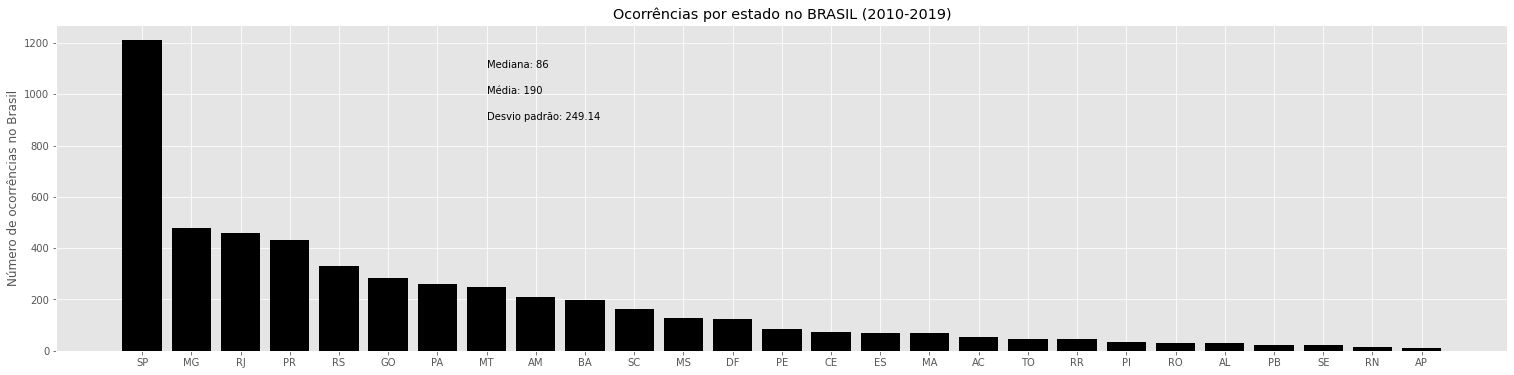

In [ ]:
estado = Counter(dadosbrasil['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(26, 6))

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='black')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências no Brasil")
plt.title('Ocorrências por estado no BRASIL (2010-2019)')
plt.text(7, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))))
plt.text(7, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))))
plt.text(7, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)))   


plt.show()

Observa-se que no Brasil, os maiores estados em que os acidentes o correram está entre SP, MG e .RJ
São Paulo tem quantidades absurdas correspondendo a mais de **50%** dos casos chegando a bater recorde de mais de **1200** acidentes
Para todos eles existe uma média de acidentes de **86%** .

**CONCLUSÃO**

O estudo aqui realizado teve como objetivo principal a contribuição para o
incremento da segurança das operações aéreas no âmbito nacional e conscientizar os
responsáveis pelo seu desenvolvimento dos iminentes riscos gerados pelos acidentes, 
os quais foram tomados como referência ao redor do mundo para o desenvolvimento de 
legislações específicas e condizentes com a realidade do setor da aviação de cada um dos países.

  Além disso, a partir da interpretação das estatísticas apresentadas torna-se claro que
acidentes deste tipo, em sua maioria, trazem sérias consequências e envolvem grandes perdas
que poderiam e deveriam ter sido evitadas. Por isso, todo trabalho voltado à prevenção de
acidentes deve ser visto como benefício à empresa aérea e à comunidade aeronáutica, e não
como gastos desnecessários. 

  Acidentes aéreos, via de regra, sempre trazem consequências ruins aos envolvidos.
Às empresas aéreas, gastos excessivos com perdas materiais, de tripulação e indenizações às
vítimas, entretanto, acima de tudo, as piores consequências serão às famílias dos envolvidos,
as quais perdem seus parentes graças à situações que poderiam ter sido evitadas a partir de um
melhor emprego da tecnologia e provisão de treinamentos adequados à tripulação de voo.
  Dessa forma, não deve haver economia de esforços por parte das autoridades
brasileiras em prol da redução do número de ocorrências de voo controlado em direção ao
terreno e perda de controle em voo, Portanto, recomenda-se
programas de conscientização, principalmente ao pessoal habilitado à pilotagem de aeronaves,
independente de tamanho, capacidade ou performance delas, quanto aos riscos e possíveis
consequências se assumir condições de voo diferentes das quais estão habilitados, além da
regulamentação de programas de treinamento adequados à realidade da aviação brasileira,
voltados à prevenção e recuperação de desvios de envelope de voo, os chamados upsets.

  Em um mercado com grande potencial para o crescimento e cuja tendência, quando
se analisando historicamente e em comparação com outros países desenvolvidos, se mostra de
forma a comprovar esta capacidade, é fundamental que o fator segurança acompanhe esta evolução, 
assegurando assim o sucesso desse meio de transporte graças à conquista da
confiança da população para o seu uso.

**Referências Bibliográficas**


Notícias acidentes aérios: https://g1.globo.com/Noticias/Mundo/0,,MUL1181784-5602,00-VEJA+ESTATISTICAS+DE+ACIDENTES+AEREOS+NO+MUNDO.html

Python funções: https://www.ime.usp.br/~vwsetzer/python-opers-funcoes.html

Python tecnicas iniciantes: https://www.freecodecamp.org/portuguese/news/exemplos-de-codigo-em-python-tutorial-de-programacao-com-scripts-de-exemplo-para-iniciantes/

Sobre o matplotlib: https://www.alura.com.br/artigos/criando-graficos-no-python-com-a-matplotlib?gclid=Cj0KCQjwqPGUBhDwARIsANNwjV6oqrUZajVHtBpXLpTb9J4-ToW2EpL1-Z_F6fIMkWDXbb_K2IDBsOMaAiUnEALw_wcB

Comandos pandas: https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93

Estatísticas em python: https://www.cienciaedados.com/3-principais-pacotes-python-para-aprender-estatistica-para-data-science/#:~:text=Stats,a%20API%20estat%C3%ADstica%20chamada%20Stats.